## Web Scraping and Analysis

### Introduction 
British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

As a data scientist at British Airways, will be applying  our analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue. Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, British Airways. 

The steps taken are;

### 1. Scraping data

### 2. Analyse the data

### 3. Present insights


### 1. Scraping data from Skytrax

For this task, we will reviews the [British Airways Airline data](https://www.airlinequality.com/airline-reviews/british-airways).  `Python` and `BeautifulSoup` will be used to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [1]:
# importing required libaries 
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# making a request to the site that contains the reviews to be extracted
# The loops used to collect 3000 reviews by iterating through the paginated pages on the website.
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
# Creating a pandas dataframe out of the reviews list
df = pd.DataFrame()
df["reviews"] = reviews

In [4]:
# reading the dataset of the first 10 columns
df.head(10)

,reviews
0,✅ Trip Verified | Customer Service does not e...
1,✅ Trip Verified | Another really great pair of...
2,Not Verified | Our A380 developed a fault tax...
3,Not Verified | Horrible airline. Does not care...
4,✅ Trip Verified | My family and I have flown ...
5,✅ Trip Verified | This has been by far the wo...
6,✅ Trip Verified | In Nov 2022 I booked and pa...
7,Not Verified | BA is not treating its premium ...
8,✅ Trip Verified | 24 hours before our departu...
9,✅ Trip Verified | We arrived at Heathrow at 0...


In [5]:
# reading the dataset of the last 10 columns
df.tail(10)

,reviews
2990,British Airways business class is outclassed b...
2991,I have to admit to not being a fan of the BA C...
2992,Club Europe from LHR to Frankfurt RTN. Outboun...
2993,LHR-PISA-LHR. I have a house in Tuscany so fly...
2994,Flew to Bangkok with Thai Airways who were lov...
2995,My partner and I booked a long weekend break w...
2996,LGW-TFS-LGW seat pitch and comfort were good. ...
2997,First time in reduced leg room Club Europe. Do...
2998,LHR-SOF-LHR seat 1A on an upgraded A320 in bot...
2999,This is not reflective of BA in general only t...


### 2. Analyse the data

The data is very messy and contain purely text. We will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, we should perform several analysis to uncover some insights. 

In [6]:
# Check the size of the dataset
print(df.shape)

(3000, 1)


#### Inference

We can see that there are 3000 reviews in the datasets

In [7]:
# check for missing values
df.isnull().sum()

reviews    0
dtype: int64

#### Inference

We can see that no missing values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [9]:
# checking the data types
df.dtypes

reviews    object
dtype: object

In [10]:
# statistical info
df.describe()

,reviews
count,3000
unique,2998
top,London Heathrow to Miami on one of British Air...
freq,2


### Structure of the dataset

There are no null values/ missing values in out dataset. There are 3000 unique entries of British Airway reviews made by its customers.

reviews: Consists of 3000 reviews from the Skytrax website corresponding to reviews made by customers who made use of the airline.

###  Data Cleaning

We will be focused more on items listed below;

1. Removing all special characters (✅ Trip Verified | and Not Verified |)

2. Removing stop words

3. Lowercasing all the words

4. Tokenize

5. Lemmatize

In [11]:
# Import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


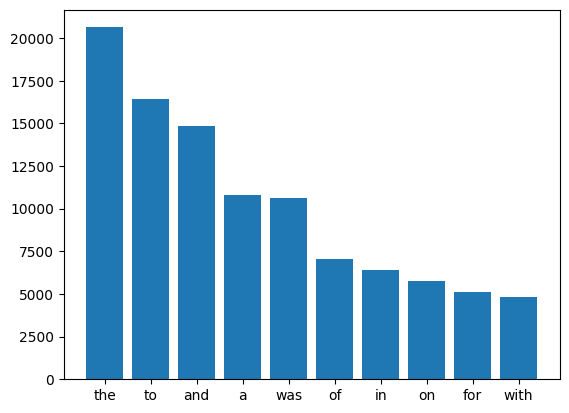

In [12]:
# visualizing the number of stop words in our dataset

import matplotlib.pyplot as plt # import libary

def plot_stopwords(df):
    stop=set(stopwords.words('english'))
    df_split= df.str.split()
    df_list=df_split.values.tolist()
    corpus=[word for i in df_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(df['reviews'])

In [13]:
# creating a list of reviews words, the reviews data is extracted and stored in a list called reviews.

reviews = list(df['reviews'])

In [14]:
# preprocessing loop, the review words are converted to lowercase, and then split into individual words.

import re

from nltk.stem import WordNetLemmatizer

# lemmatizing each word (reduced to its base form) using the WordNetLemmatizer from nltk
lemmatizer = WordNetLemmatizer()

# joining the preprocessed text back together into a string and adding to a new list called corpus
corpus = []

for i in range(len(reviews)):

    r = re.sub('[^a-zA-Z]', ' ', reviews[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)

In [15]:
# assigning corpus to data['reviews']
df['reviews'] = corpus

# printing the updated data
df.head()

,reviews
0,trip verified customer service exist one world...
1,trip verified another really great pair flight...
2,verified developed fault taxiing runway return...
3,verified horrible airline care customer used d...
4,trip verified family flown mostly british airw...


In [16]:
# a view of the reviews
df.reviews

0       trip verified customer service exist one world...
1       trip verified another really great pair flight...
2       verified developed fault taxiing runway return...
3       verified horrible airline care customer used d...
4       trip verified family flown mostly british airw...
                              ...                        
2995    partner booked long weekend break ba nyc inclu...
2996    lgw tfs lgw seat pitch comfort good snack perf...
2997    first time reduced leg room club europe bother...
2998    lhr sof lhr seat upgraded direction check quic...
2999    reflective ba general particular flight flew l...
Name: reviews, Length: 3000, dtype: object

### Computing Sentiment Analysis.

In [17]:
# Calculating polarity

# import TextBlob libary
from textblob import TextBlob

def polarity_comp(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_comp(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df['polarity'] = df['reviews'].apply(polarity_comp)


df['tag'] = df['polarity'].apply(tag_comp)


print(df)

                                                reviews  polarity       tag
0     trip verified customer service exist one world... -0.027941  Negative
1     trip verified another really great pair flight...  0.526970  Positive
2     verified developed fault taxiing runway return... -0.019697  Negative
3     verified horrible airline care customer used d... -0.086667  Negative
4     trip verified family flown mostly british airw...  0.157778  Positive
...                                                 ...       ...       ...
2995  partner booked long weekend break ba nyc inclu... -0.039423  Negative
2996  lgw tfs lgw seat pitch comfort good snack perf...  0.232143  Positive
2997  first time reduced leg room club europe bother...  0.305556  Positive
2998  lhr sof lhr seat upgraded direction check quic...  0.183929  Positive
2999  reflective ba general particular flight flew l...  0.011728  Positive

[3000 rows x 3 columns]


In [18]:
# getting percentage of various types of tags.
(df.groupby('tag').size()/df['tag'].count())*100

tag
Negative    29.566667
Neutral      0.700000
Positive    69.733333
dtype: float64

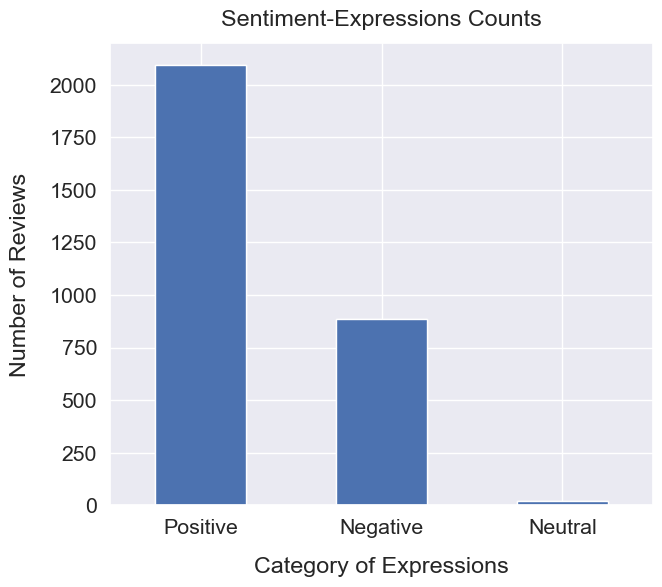

In [23]:
# importing seaborn libary
import seaborn as sns

df['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Category of Expressions", labelpad=14)
plt.ylabel("Number of Reviews", labelpad=14)
plt.title("Sentiment-Expressions Counts", y=1.02);

#### Inference

From the Sentiment tags, we see that reviews that contains  Negative expression are 29%, Neutral expression are 0.7% and Positve expressions being the highest with 69.7%

### Generating word cloud visualization

In [24]:
# importing necessary libary from sklearn feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# transforming the text data into a matrix of token counts.
cv = CountVectorizer()


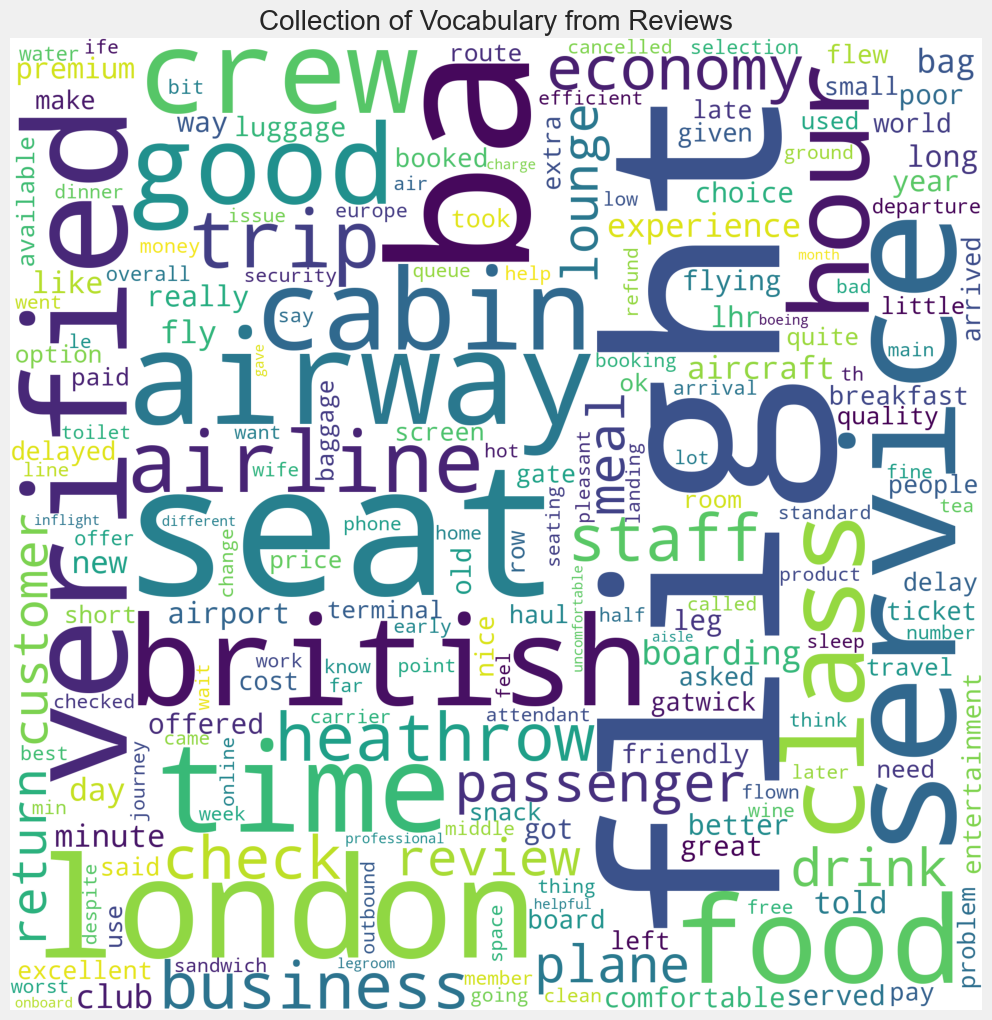

In [25]:
# generating word cloud visualization

# import libary
from wordcloud import WordCloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['reviews'])
all_voc = words.sum(axis=0)

freq_voc = [(word, all_voc[0, idx]) for word, idx in cv.vocabulary_.items()]
freq_voc = sorted(freq_voc, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 2000).generate_from_frequencies(dict(freq_voc))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Collection of Vocabulary from Reviews", fontsize = 20)

# displaying the word cloud
plt.show()

#### Inference

The outputs from the wordcloud shows the fequently vocabulary used in the reviews made by customers flying British Airways

In [26]:
# saving data collected 
df.to_csv("data/BA_reviews.csv")

PermissionError: [Errno 13] Permission denied: 'data/BA_reviews.csv'